# Load GeoTiff file from a seachable STAC catalog

This notebook shows an example how to load a GeoTIFF file from a searchable STAC catalog. 

A searchable catalog implements the [STAC API - Item Search](https://github.com/radiantearth/stac-api-spec/tree/release/v1.0.0/item-search) conformance class, which provides the ability to search for STAC Item objects across collections.

### Setup
In order to run this notebook you need to install [`xcube_stac`](https://github.com/xcube-dev/xcube-stac). You may install [`xcube_stac`](https://github.com/xcube-dev/xcube-stac) directly from the git repository by cloning the repository, directing into `xcube-stac`, and following the steps below:

```bash
conda env create -f environment.yml
conda activate xcube-stac
pip install .
```

Note that [`xcube_stac`](https://github.com/xcube-dev/xcube-stac) is a plugin of [`xcube`](https://xcube.readthedocs.io/en/latest/), where `xcube` is included in the `environment.yml`.  

Now, we first import everything we need:

In [1]:
%%time
from xcube.core.store import new_data_store, get_data_store_params_schema
import itertools

CPU times: user 2.8 s, sys: 272 ms, total: 3.08 s
Wall time: 1.2 s


First, we get the store parameters needed to initialize a STAC [data store](https://xcube.readthedocs.io/en/latest/dataaccess.html#data-store-framework). 

In [2]:
%%time
store_params = get_data_store_params_schema("stac")
store_params

CPU times: user 633 ms, sys: 83.1 ms, total: 716 ms
Wall time: 719 ms


We determine the url of the [Earth Search](https://element84.com/earth-search/) STAC catalog and initiate a STAC [data store](https://xcube.readthedocs.io/en/latest/dataaccess.html#data-store-framework), where the `xcube-stac` plugin is recognized by setting the first argument to `"stac"` in the `new_data_store` function.

In [3]:
%%time
url = "https://earth-search.aws.element84.com/v1"
store = new_data_store("stac", url=url)

CPU times: user 10.2 ms, sys: 0 ns, total: 10.2 ms
Wall time: 493 ms


The data IDs point to a [STAC item's JSON](https://github.com/radiantearth/stac-spec/blob/master/item-spec/item-spec.md) and are specified by the segment of the URL that follows the catalog's URL. The data IDs can be streamed using the following code where we show the first 10 data IDs as an example.

In [4]:
%%time
data_ids = store.get_data_ids()
list(itertools.islice(data_ids, 10))

CPU times: user 6.66 ms, sys: 531 μs, total: 7.19 ms
Wall time: 1.34 s


['collections/sentinel-1-grd/items/S1A_EW_GRDM_1SDH_20240830T102653_20240830T102751_055441_06C349',
 'collections/sentinel-1-grd/items/S1A_EW_GRDM_1SDH_20240830T102553_20240830T102653_055441_06C349',
 'collections/sentinel-1-grd/items/S1A_EW_GRDM_1SDH_20240830T102449_20240830T102553_055441_06C349',
 'collections/sentinel-1-grd/items/S1A_EW_GRDM_1SDH_20240830T093041_20240830T093150_055440_06C345',
 'collections/sentinel-1-grd/items/S1A_IW_GRDH_1SSH_20240830T092739_20240830T092804_055440_06C344',
 'collections/sentinel-1-grd/items/S1A_IW_GRDH_1SSH_20240830T092714_20240830T092739_055440_06C344',
 'collections/sentinel-1-grd/items/S1A_IW_GRDH_1SSH_20240830T092645_20240830T092714_055440_06C344',
 'collections/sentinel-2-c1-l2a/items/S2A_T36WXV_20240830T092026_L2A',
 'collections/sentinel-2-l2a/items/S2A_36WXV_20240830_0_L2A',
 'collections/sentinel-2-l1c/items/S2A_36WXV_20240830_0_L1C']

In the next step, we can search for items using search parameters. The following code shows which search parameters are available.

In [5]:
%%time
search_params = store.get_search_params_schema()
search_params

CPU times: user 27 μs, sys: 0 ns, total: 27 μs
Wall time: 30.3 μs


Now, let's search for Sentinel-2 L2a data in the region of Lake Constance for the period from June 1st to June 5th, 2020.

In [6]:
%%time
descriptors = list(
    store.search_data(
        collections=["sentinel-2-l2a"],
        bbox=[9, 47, 10, 48],
        time_range=["2020-07-01", "2020-07-05"],
    )
)
[d.to_dict() for d in descriptors]

CPU times: user 122 ms, sys: 13.7 ms, total: 136 ms
Wall time: 11.2 s


[{'data_id': 'collections/sentinel-2-l2a/items/S2B_32TMT_20200705_1_L2A',
  'data_type': 'dataset',
  'bbox': [7.769228745834018,
   46.85909198885185,
   9.130456971519783,
   47.85361872923358],
  'time_range': ('2020-07-05T10:27:51.180000Z', None)},
 {'data_id': 'collections/sentinel-2-l2a/items/S2B_32TMT_20200705_0_L2A',
  'data_type': 'dataset',
  'bbox': [7.762146064135137,
   46.85901560719437,
   9.130456971519783,
   47.85361872923358],
  'time_range': ('2020-07-05T10:27:51.177000Z', None)},
 {'data_id': 'collections/sentinel-2-l2a/items/S2B_32TNT_20200705_1_L2A',
  'data_type': 'dataset',
  'bbox': [8.999746010269408,
   46.85664904260366,
   10.467263761969436,
   47.85369284462768],
  'time_range': ('2020-07-05T10:27:47.411000Z', None)},
 {'data_id': 'collections/sentinel-2-l2a/items/S2B_32TNT_20200705_0_L2A',
  'data_type': 'dataset',
  'bbox': [8.999746010269408,
   46.85664904260366,
   10.467263761969436,
   47.85369284462768],
  'time_range': ('2020-07-05T10:27:47.4090

In the next step, we can open the data for each data ID. The following code shows which parameters are available for opening the data.

In [7]:
%%time
open_params = store.get_open_data_params_schema()
open_params

CPU times: user 81 μs, sys: 8 μs, total: 89 μs
Wall time: 92 μs


We select the band red (B04), green (B03), and blue (B02) and lazily load the corresponding data.

In [8]:
%%time
ds = store.open_data(
    descriptors[3].data_id,
    asset_names=["blue", "green", "nir"]
)
ds

CPU times: user 87.9 ms, sys: 11.5 ms, total: 99.4 ms
Wall time: 3.21 s


<xarray.Dataset> Size: 3GB
Dimensions:      (x: 10980, y: 10980)
Coordinates:
  * x            (x) float64 88kB 5e+05 5e+05 5e+05 ... 6.098e+05 6.098e+05
  * y            (y) float64 88kB 5.3e+06 5.3e+06 5.3e+06 ... 5.19e+06 5.19e+06
    spatial_ref  int64 8B 0
Data variables:
    blue         (y, x) float64 964MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    green        (y, x) float64 964MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    nir          (y, x) float64 964MB dask.array<chunksize=(512, 512), meta=np.ndarray>
Attributes:
    source:   s3://sentinel-cogs/sentinel-s2-l2a-cogs/32/T/NT/2020/7/S2B_32TN...

We plot the loaded data as an example below.

CPU times: user 1.16 s, sys: 604 ms, total: 1.76 s
Wall time: 1min 41s


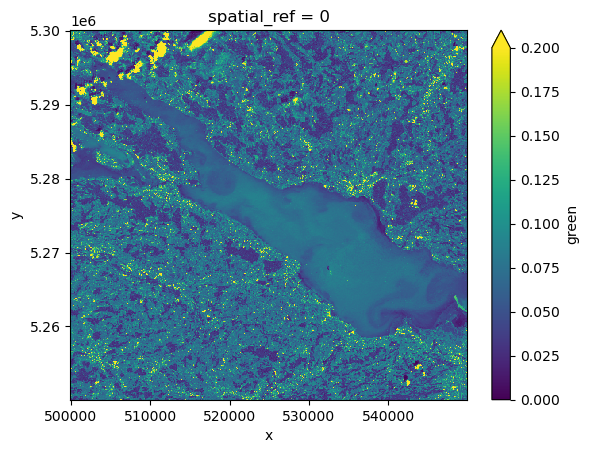

In [9]:
%%time
ds.green[:5000:10, :5000:10].plot(vmin=0.0, vmax=0.2)

We can also open a GeoTIFF as a [xcube's multi-resolution  dataset](https://xcube.readthedocs.io/en/latest/mldatasets.html#xcube-multi-resolution-datasets), where we can select the level of resolution, shown below.  

In [10]:
%%time
mlds = store.open_data(
    descriptors[3].data_id,
    asset_names=["blue", "green", "nir"],
    data_type="mldataset"
)
mlds.num_levels

CPU times: user 52.4 ms, sys: 4.12 ms, total: 56.5 ms
Wall time: 3.5 s


5

In [11]:
ds = mlds.get_dataset(4)
ds

<xarray.Dataset> Size: 11MB
Dimensions:      (x: 687, y: 687)
Coordinates:
  * x            (x) float64 5kB 5.001e+05 5.002e+05 ... 6.095e+05 6.097e+05
  * y            (y) float64 5kB 5.3e+06 5.3e+06 5.3e+06 ... 5.19e+06 5.19e+06
    spatial_ref  int64 8B 0
Data variables:
    blue         (y, x) float64 4MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    green        (y, x) float64 4MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    nir          (y, x) float64 4MB dask.array<chunksize=(512, 512), meta=np.ndarray>
Attributes:
    source:   s3://sentinel-cogs/sentinel-s2-l2a-cogs/32/T/NT/2020/7/S2B_32TN...

CPU times: user 42.5 ms, sys: 504 μs, total: 43 ms
Wall time: 1.64 s


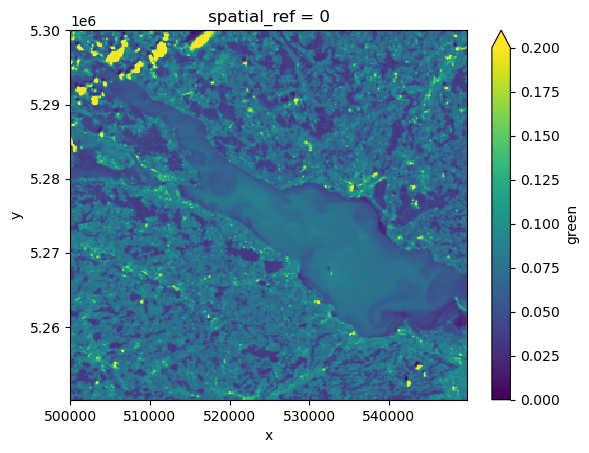

In [12]:
%%time
ds.green[:312, :312].plot(vmin=0.0, vmax=0.2)